In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import lf14 as lf
#import iop_ext as iop

#constants
Mearth = 5.97219e24 # kg
Rearth = 6.371e6 # m 

In [70]:
# Import NEA masses and radii

nea_output_file= "./data/catalog_exoplanets.dat"

list_catalog_rp, list_catalog_mp, list_catalog_rpe1, list_catalog_rpe2, list_catalog_mpe1, list_catalog_mpe2 = np.genfromtxt(nea_output_file, 
                                                                                                                             delimiter="\t",
                                                                                                                             unpack=True,
                                                                                                                             usecols=(1,4,2,3,5,6),
                                                                                                                             filling_values=0.0)

list_catalog_mpe = [abs(list_catalog_mpe2), list_catalog_mpe1]
list_catalog_rpe = [abs(list_catalog_rpe2), list_catalog_rpe1]

print("Exoplanet catalog imported successfully.")

Exoplanet catalog imported successfully.


In [50]:
### Import mass-radius models from Li Zeng 2016, iop_ext, TOI-836b planet evolution, and lf14

# Pure iron planet
list_zeng_fe_m, list_zeng_fe_r = np.loadtxt("./models/zeng-iron.dat", unpack=True, usecols=(0,1))

# Earth-like planet
list_zeng_earth_m, list_zeng_earth_r = np.loadtxt("./models/zeng-earth.dat", unpack=True, usecols=(0,1))

# Pure rock planet
list_zeng_rock_m, list_zeng_rock_r = np.loadtxt("./models/zeng-rock.dat", unpack=True, usecols=(0,1))

# 50% Water planet
list_zeng_water_m, list_zeng_water_r = np.loadtxt("./models/Zeng2016.dat", unpack=True, usecols=(0,3))

# 50% Steam planet
import iop_ext as iop
from iop_ext import radius_iop

cmf = .325 #core mass fraction
wmf = .5 #water mass fraction
pmass = np.logspace(np.log10(0.1), np.log10(20.0), 100) #mass of planet
teq = 600 #equilibrium temperature at surface

steamradius = np.array([radius_iop(cmf,wmf,teq,mp) for mp in pmass])
error = np.array([iop.error_iop(cmf,wmf,teq,mp) for mp in pmass])
mask_valid = (error==0)

#100% Steam planet
cmf2 = .325 #core mass fraction
wmf2 = 1 #water mass fraction
pmass2 = np.logspace(np.log10(0.1), np.log10(20.0), 100) #mass of planet
teq2 = 600 #equilibrium temperature at surface

steamradius2 = np.array([radius_iop(cmf2,wmf2,teq2,mp2) for mp2 in pmass2])
error2 = np.array([iop.error_iop(cmf2,wmf2,teq2,mp2) for mp2 in pmass2])
mask_valid2 = (error2==0)

# lf14 mass-radius relationships (5% hydrogen (H_2)/helium (He), 95% rocky core)
met = 1 # atmospheric metallicity
age = 5.0 # system age
fenv = 5.0 # planet envelope mass fraction
teq2 = 600 #equilibrium temperature at surface
pmass2 = np.logspace(np.log10(0.1), np.log10(20.0), 100)

lfradii = np.array([lf.radius_lf14(met,age,fenv,teq2,mp2) for mp2 in pmass2])

# Planet evolution
evo_toi836b_m, evo_toi836b_r, = np.loadtxt("./data/evolution_TOI-836b_JJ.dat", unpack=True, usecols=(1,2))
evo_kepler138c_m, evo_kepler138c_r, = np.loadtxt("./data/evolution_Kepler-138c_JJ.dat", unpack=True, usecols=(1,2))
evo_k23c_m, evo_k23c_r, = np.loadtxt("./data/evolution_K2-3c_JJ.dat", unpack=True, usecols=(1,2))
evo_toi178b_m, evo_toi178b_r, = np.loadtxt("./data/evolution_TOI-178b_JJ.dat", unpack=True, usecols=(1,2))
evo_k218b_m, evo_k218b_r, = np.loadtxt("./data/evolution_K2-18b_AC.dat", unpack=True, usecols=(1,2))
evo_toi1075b_m, evo_toi1075b_r, = np.loadtxt("./data/evolution_TOI-1075b_AC.dat", unpack=True, usecols=(1,2))
print("Mass-radius data curves imported successfully")

Mass-radius data curves imported successfully


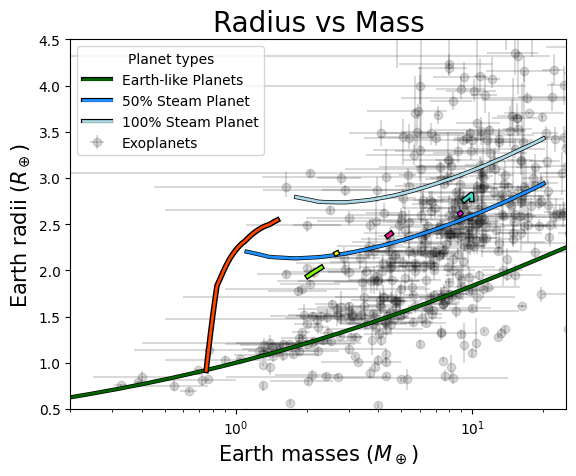

In [69]:
# Make the plot WITHOUT EXOPLANET NAMES!!!!!!!!!!!!!!!

N_exo = len(list_catalog_mp) #Length/number of data fvalues in list_catalog_mp
point_sizes = np.ones(N_exo)*5.0 #size of each planet

#plot exoplanets
#plt.scatter(list_catalog_mp,list_catalog_rp, color="black", alpha = 0.5, sizes=point_sizes, label = "Exoplanets")

catalog_points = plt.errorbar(list_catalog_mp,list_catalog_rp,
            yerr=list_catalog_rpe,
            xerr=list_catalog_mpe,
            fmt='o',zorder=-30,
            c="black",alpha=0.15,
            label='Exoplanets')

#plot the models

# Li Zeng 2016
#plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="brown", linestyle="--", linewidth=2, label="Pure Iron Planets")
plt.plot(list_zeng_earth_m, list_zeng_earth_r, color="darkgreen", linestyle="-", linewidth=2, label="Earth-like Planets", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
#plt.plot(list_zeng_rock_m, list_zeng_rock_r, color="red", linestyle="--", linewidth=2, label="Pure Rock Planets")
#plt.plot(list_zeng_water_m, list_zeng_water_r, color="cyan", linestyle="--", linewidth=2, label="50% Water Planet")

# iop model
plt.plot(pmass[mask_valid], steamradius[mask_valid], color="dodgerblue", linestyle="-", lw=2, label="50% Steam Planet", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()]) #50% steam
plt.plot(pmass2[mask_valid2], steamradius2[mask_valid2], color="lightblue", linestyle="-", lw=2, label="100% Steam Planet", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])#100% steam

# LF 2014
#plt.plot(pmass2, lfradii, color="goldenrod", linestyle="-", linewidth=2, label=r"5% $H_2$ and He (LF2014)")

# Evolution simulation
plt.plot(evo_toi836b_m, evo_toi836b_r, color="deeppink", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #TOI-836b
plt.plot(evo_kepler138c_m, evo_kepler138c_r, color="chartreuse", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #Kepler-138c
plt.plot(evo_k23c_m, evo_k23c_r, color="yellow", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #k2-3c
plt.plot(evo_toi178b_m, evo_toi178b_r, color="orangered", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #toi-178b

plt.plot(evo_k218b_m/Mearth, evo_k218b_r/Rearth, color="fuchsia", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #Alex k2-18b
plt.plot(evo_toi1075b_m/Mearth, evo_toi1075b_r/Rearth, color="turquoise", linestyle="-", linewidth=2, path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #Alex toi-1075b

#Figure details
plt.xscale('log') #put the x-axis in log scale
plt.xlim(.2,25) #domain
plt.ylim(.5,4.5) #range

#Label the figure
plt.title('Radius vs Mass', fontsize=20)
plt.xlabel('Earth masses ($M_\\oplus$)', fontsize=15)
plt.ylabel('Earth radii ($R_\\oplus$)', fontsize=15)
plt.legend(loc="upper left", title="Planet types", bbox_to_anchor=(0,1))

plt.show()

## hi ##

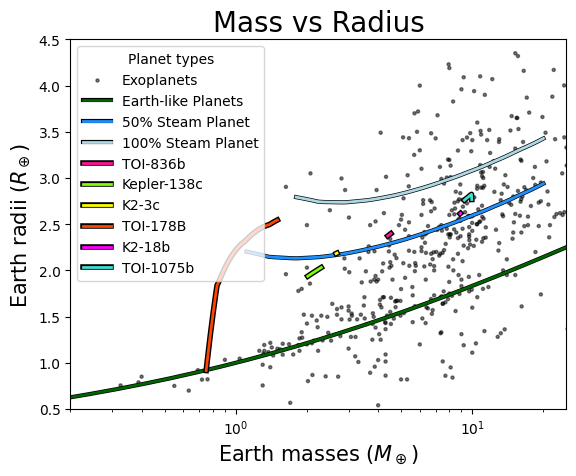

In [58]:
# Make the plot WITH EXOPLANETS

N_exo = len(list_catalog_mp) #Length/number of data fvalues in list_catalog_mp
point_sizes = np.ones(N_exo)*5.0 #size of each planet

#plot exoplanets
plt.scatter(list_catalog_mp,list_catalog_rp, color="black", alpha = 0.5, sizes=point_sizes, label = "Exoplanets")

#plot the models

# Li Zeng 2016
#plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="brown", linestyle="--", linewidth=2, label="Pure Iron Planets")
plt.plot(list_zeng_earth_m, list_zeng_earth_r, color="darkgreen", linestyle="-", linewidth=2, label="Earth-like Planets", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])
#plt.plot(list_zeng_rock_m, list_zeng_rock_r, color="red", linestyle="--", linewidth=2, label="Pure Rock Planets")
#plt.plot(list_zeng_water_m, list_zeng_water_r, color="cyan", linestyle="--", linewidth=2, label="50% Water Planet")

# iop model
plt.plot(pmass[mask_valid], steamradius[mask_valid], color="dodgerblue", linestyle="-", lw=2, label="50% Steam Planet", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()]) #50% steam
plt.plot(pmass2[mask_valid2], steamradius2[mask_valid2], color="lightblue", linestyle="-", lw=2, label="100% Steam Planet", path_effects=[pe.Stroke(linewidth=3, foreground='k'), pe.Normal()])#100% steam

# LF 2014
#plt.plot(pmass2, lfradii, color="goldenrod", linestyle="-", linewidth=2, label=r"5% $H_2$ and He (LF2014)")

# Evolution simulation
plt.plot(evo_toi836b_m, evo_toi836b_r, color="deeppink", linestyle="-", linewidth=2, label="TOI-836b", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #TOI-836b
plt.plot(evo_kepler138c_m, evo_kepler138c_r, color="chartreuse", linestyle="-", linewidth=2, label="Kepler-138c", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #potentially wrong
plt.plot(evo_k23c_m, evo_k23c_r, color="yellow", linestyle="-", linewidth=2, label="K2-3c", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
plt.plot(evo_toi178b_m, evo_toi178b_r, color="orangered", linestyle="-", linewidth=2, label="TOI-178B", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])

plt.plot(evo_k218b_m/Mearth, evo_k218b_r/Rearth, color="fuchsia", linestyle="-", linewidth=2, label="K2-18b", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #Alex
plt.plot(evo_toi1075b_m/Mearth, evo_toi1075b_r/Rearth, color="turquoise", linestyle="-", linewidth=2, label="TOI-1075b", path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()]) #Alex

#Figure details
plt.xscale('log') #put the x-axis in log scale
plt.xlim(.2,25) #domain
plt.ylim(.5,4.5) #range

#Label the figure
plt.title('Mass vs Radius', fontsize=20)
plt.xlabel('Earth masses ($M_\\oplus$)', fontsize=15)
plt.ylabel('Earth radii ($R_\\oplus$)', fontsize=15)
plt.legend(loc="upper left", title="Planet types", bbox_to_anchor=(0,1))

plt.show()

In [21]:
pe.Stroke?

Init signature: pe.Stroke(offset=(0, 0), **kwargs)
Docstring:      A line based PathEffect which re-draws a stroke.
Init docstring:
The path will be stroked with its gc updated with the given
keyword arguments, i.e., the keyword arguments should be valid
gc parameter values.
File:           c:\users\pikac\appdata\roaming\python\python313\site-packages\matplotlib\patheffects.py
Type:           type
Subclasses:     withStroke

In [23]:
pe.Normal?

Init signature: pe.Normal(offset=(0.0, 0.0))
Docstring:     
The "identity" PathEffect.

The Normal PathEffect's sole purpose is to draw the original artist with
no special path effect.
Init docstring:
Parameters
----------
offset : (float, float), default: (0, 0)
    The (x, y) offset to apply to the path, measured in points.
File:           c:\users\pikac\appdata\roaming\python\python313\site-packages\matplotlib\patheffects.py
Type:           type
Subclasses:     